<a href="https://colab.research.google.com/github/Manishpirabu/INSE6220/blob/main/Principal_Component_Analysis_and_Breast_Cancer_Diagnosis_Using_Machine_Learningr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Principal Component Analysis of brain tumor Dataset**

In [1]:
!pip install pycaret==3.0.0

  Using cached pycaret-3.0.0-py3-none-any.whl (481 kB)
  Attempting uninstall: pycaret
    Found existing installation: pycaret 3.2.0
    Uninstalling pycaret-3.2.0:
      Successfully uninstalled pycaret-3.2.0


In [2]:
from pycaret.utils import version
version()

'3.0.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


Getting CSV file

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Manishpirabu/Braintumor_dataset/main/Tumor_dataset.csv')
df.head(25)

Class       Mean     Variance  Standard Deviation   Entropy       ASM  \
0       0   6.535339   619.587845           24.891522  0.109059  0.086033   
1       0   8.749969   805.957634           28.389393  0.266538  0.225674   
2       1   7.341095  1143.808219           33.820234  0.001467  0.001019   
3       1   5.958145   959.711985           30.979219  0.001477  0.001026   
4       0   7.315231   729.540579           27.010009  0.146761  0.118232   
5       0   7.524109   607.395258           24.645390  0.214086  0.177736   
6       0  12.304413   922.746138           30.376737  0.128833  0.102832   
7       0  15.929474  1069.950248           32.710094  0.107658  0.084868   
8       0  19.921616  1166.120922           34.148513  0.094975  0.074248   
9       1   8.476196  1095.785127           33.102645  0.003002  0.002087   
10      1   9.804611  1114.829653           33.389065  0.002436  0.001692   
11      1  12.326782  1150.677144           33.921632  0.003769  0.002634   
12      1  10.193466   813.924363           28.529360  0.009774  0.006936   
13      0   7.156311   413.438221           20.333180  0.081825  0.062955   
14      0   5.291473   430.963766           20.759667  0.354116  0.308402   
15      1  12.773941   988.403172           31.438880  0.002234  0.001552   
16      1  15.317520  1076.878002           32.815819  0.004808  0.003372   
17      0   6.246719   459.398171           21.433576  0.121085  0.096014   
18      0   5.450424   337.879291           18.381493  0.112746  0.088699   
19      0   8.333740   475.782357           21.812436  0.204902  0.169272   
20      0   6.339523   293.878381           17.142881  0.069965  0.053554   
21      0   1.480270    62.091259            7.879801  0.132055  0.105490   
22      0   4.506058   280.829159           16.757958  0.133243  0.106421   
23      0   6.592896   392.211339           19.804326  0.204876  0.169241   
24      0  10.964294   619.832925           24.896444  0.126598  0.100810   

    Homogeneity  Dissimilarity  Correlation     Coarseness  
0      0.530941       4.473346     0.981939  7.460000e-155  
1      0.651352       3.220072     0.988834  7.460000e-155  
2      0.268275       5.981800     0.978014  7.460000e-155  
3      0.243851       7.700919     0.964189  7.460000e-155  
4      0.501140       6.834689     0.972789  7.460000e-155  
5      0.598169       4.193146     0.976485  7.460000e-155  
6      0.532292       4.880320     0.974745  7.460000e-155  
7      0.532262       4.242054     0.976774  7.460000e-155  
8      0.526644       4.027167     0.974310  7.460000e-155  
9      0.361432       4.590795     0.967830  7.460000e-155  
10     0.375618       4.626763     0.968750  7.460000e-155  
11     0.385292       5.215436     0.958601  7.460000e-155  
12     0.470426       3.566798     0.946884  7.460000e-155  
13     0.583889       3.552497     0.938238  7.460000e-155  
14     0.721321       2.373637     0.987914  7.460000e-155  
15     0.373190       5.033600     0.974600  7.460000e-155  
16     0.399251       5.049049     0.959733  7.460000e-155  
17     0.559772       4.234021     0.972072  7.460000e-155  
18     0.620169       2.621622     0.973651  7.460000e-155  
19     0.652962       2.899785     0.972400  7.460000e-155  
20     0.523958       4.117353     0.935662  7.460000e-155  
21     0.535062       3.875661     0.912182  7.460000e-155  
22     0.581162       3.011792     0.977915  7.460000e-155  
23     0.635297       2.988966     0.971015  7.460000e-155  
24     0.564082       3.771747     0.966220  7.460000e-155

In [6]:
len(df.index)

3762

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               3762 non-null   int64  
 1   Mean                3762 non-null   float64
 2   Variance            3762 non-null   float64
 3   Standard Deviation  3762 non-null   float64
 4   Entropy             3762 non-null   float64
 5   ASM                 3762 non-null   float64
 6   Homogeneity         3762 non-null   float64
 7   Dissimilarity       3762 non-null   float64
 8   Correlation         3762 non-null   float64
 9   Coarseness          3762 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 294.0 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  63


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

 if Tumor = 0, not Tumor = 1

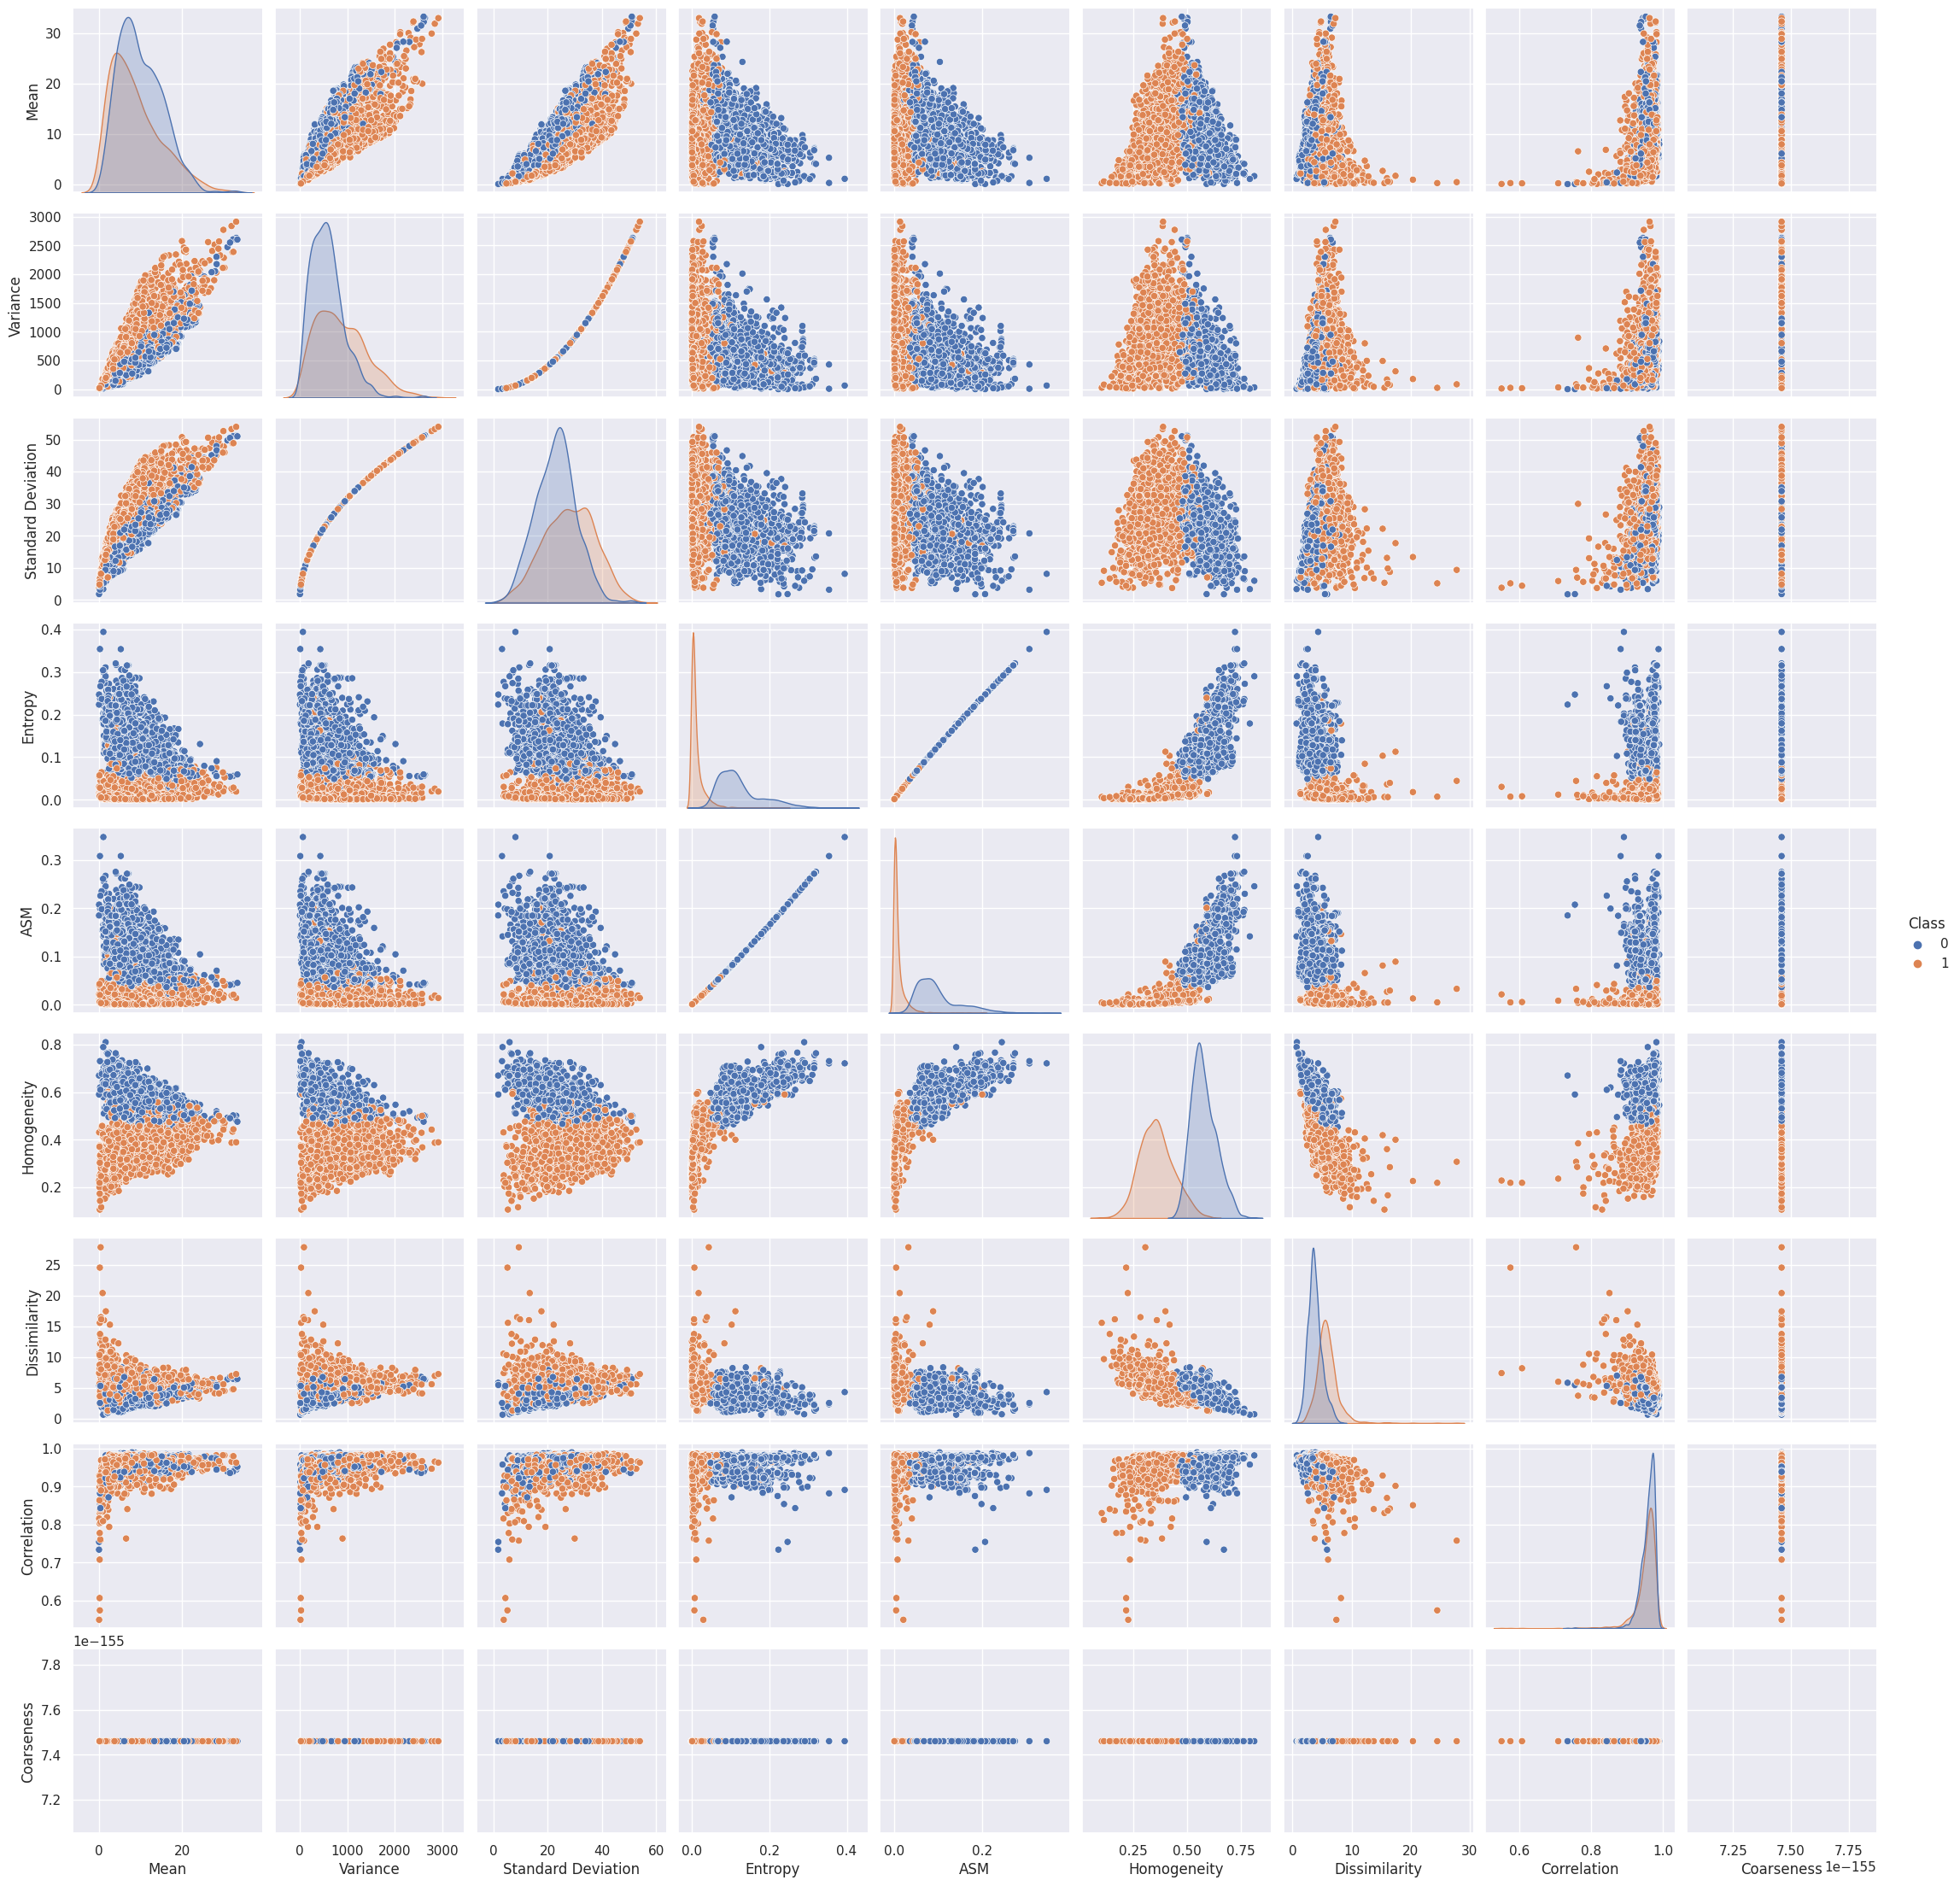

In [10]:
sns.pairplot(df, hue='Class')
plt.show()

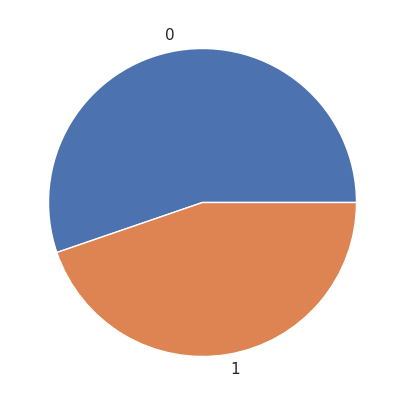

In [11]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [12]:
X = df.drop(columns=['Class'])
X.head(10)

Mean     Variance  Standard Deviation   Entropy       ASM  \
0   6.535339   619.587845           24.891522  0.109059  0.086033   
1   8.749969   805.957634           28.389393  0.266538  0.225674   
2   7.341095  1143.808219           33.820234  0.001467  0.001019   
3   5.958145   959.711985           30.979219  0.001477  0.001026   
4   7.315231   729.540579           27.010009  0.146761  0.118232   
5   7.524109   607.395258           24.645390  0.214086  0.177736   
6  12.304413   922.746138           30.376737  0.128833  0.102832   
7  15.929474  1069.950248           32.710094  0.107658  0.084868   
8  19.921616  1166.120922           34.148513  0.094975  0.074248   
9   8.476196  1095.785127           33.102645  0.003002  0.002087   

   Homogeneity  Dissimilarity  Correlation     Coarseness  
0     0.530941       4.473346     0.981939  7.460000e-155  
1     0.651352       3.220072     0.988834  7.460000e-155  
2     0.268275       5.981800     0.978014  7.460000e-155  
3     0.243851       7.700919     0.964189  7.460000e-155  
4     0.501140       6.834689     0.972789  7.460000e-155  
5     0.598169       4.193146     0.976485  7.460000e-155  
6     0.532292       4.880320     0.974745  7.460000e-155  
7     0.532262       4.242054     0.976774  7.460000e-155  
8     0.526644       4.027167     0.974310  7.460000e-155  
9     0.361432       4.590795     0.967830  7.460000e-155

In [13]:
X.describe().transpose()

count           mean         std            min  \
Mean                3762.0   9.488890e+00    5.728022   7.865906e-02   
Variance            3762.0   7.111011e+02  467.466896   3.145628e+00   
Standard Deviation  3762.0   2.518227e+01    8.773526   1.773592e+00   
Entropy             3762.0   7.360262e-02    0.070269   8.815800e-04   
ASM                 3762.0   5.863159e-02    0.058300   6.116310e-04   
Homogeneity         3762.0   4.792519e-01    0.127929   1.054898e-01   
Dissimilarity       3762.0   4.698498e+00    1.850173   6.811207e-01   
Correlation         3762.0   9.557667e-01    0.026157   5.494262e-01   
Coarseness          3762.0  7.460000e-155    0.000000  7.460000e-155   

                              25%            50%            75%            max  
Mean                 4.982395e+00   8.477531e+00   1.321272e+01   3.323997e+01  
Variance             3.632255e+02   6.225804e+02   9.669543e+02   2.910582e+03  
Standard Deviation   1.905847e+01   2.495156e+01   3.109589e+01   5.394981e+01  
Entropy              6.856456e-03   6.662805e-02   1.132844e-01   3.945386e-01  
ASM                  4.846590e-03   5.084867e-02   8.934206e-02   3.477246e-01  
Homogeneity          3.649727e-01   5.125512e-01   5.755566e-01   8.109208e-01  
Dissimilarity        3.412363e+00   4.482404e+00   5.723821e+00   2.782775e+01  
Correlation          9.471379e-01   9.616098e-01   9.713547e-01   9.899724e-01  
Coarseness          7.460000e-155  7.460000e-155  7.460000e-155  7.460000e-155

**Standardize the Data**

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Mean  Variance  Standard Deviation   Entropy       ASM  Homogeneity  \
0 -0.515700 -0.195790           -0.033144  0.504650  0.470073     0.404100   
1 -0.129018  0.202943            0.365594  2.746050  2.865580     1.345457   
2 -0.375013  0.925765            0.984680 -1.026708 -0.988340    -1.649391   
3 -0.616481  0.531896            0.660820 -1.026561 -0.988223    -1.840334   
4 -0.379529  0.039451            0.208352  1.041256  1.022442     0.171115   
5 -0.343058 -0.221876           -0.061201  1.999492  2.043216     0.929680   
6  0.491600  0.452809            0.592140  0.786094  0.758254     0.414664   
7  1.124549  0.767748            0.858130  0.484704  0.450084     0.414424   
8  1.821591  0.973503            1.022101  0.304199  0.267905     0.370503   
9 -0.176820  0.823021            0.902878 -1.004859 -0.970011    -0.921103   

   Dissimilarity  Correlation  Coarseness  
0      -0.121709     1.000713         0.0  
1      -0.799181     1.264377         0.0  
2       0.693704     0.850636         0.0  
3       1.622995     0.322041         0.0  
4       1.154744     0.650854         0.0  
5      -0.273174     0.792183         0.0  
6       0.098286     0.725663         0.0  
7      -0.246736     0.803243         0.0  
8      -0.362896     0.709033         0.0  
9      -0.058220     0.461240         0.0

In [15]:
X.describe().transpose()

count          mean       std        min       25%  \
Mean                3762.0 -2.285371e-16  1.000133  -1.643060 -0.786850   
Variance            3762.0  0.000000e+00  1.000133  -1.514652 -0.744271   
Standard Deviation  3762.0  2.568682e-16  1.000133  -2.668459 -0.698079   
Entropy             3762.0 -1.510989e-17  1.000133  -1.035037 -0.949997   
ASM                 3762.0  1.359890e-16  1.000133  -0.995323 -0.922673   
Homogeneity         3762.0  3.928572e-16  1.000133  -2.922023 -0.893420   
Dissimilarity       3762.0  7.554947e-17  1.000133  -2.171641 -0.695235   
Correlation         3762.0  1.684753e-15  1.000133 -15.536855 -0.329931   
Coarseness          3762.0  0.000000e+00  0.000000   0.000000  0.000000   

                         50%       75%        max  
Mean               -0.176587  0.650194   4.147024  
Variance           -0.189388  0.547391   4.705730  
Standard Deviation -0.026300  0.674119   3.279339  
Entropy            -0.099269  0.564790   4.567876  
ASM                -0.133515  0.526833   4.959343  
Homogeneity         0.260329  0.752898   2.592945  
Dissimilarity      -0.116812  0.554251  12.502795  
Correlation         0.223417  0.596023   1.307888  
Coarseness          0.000000  0.000000   0.000000

**Observations and variables**

In [16]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

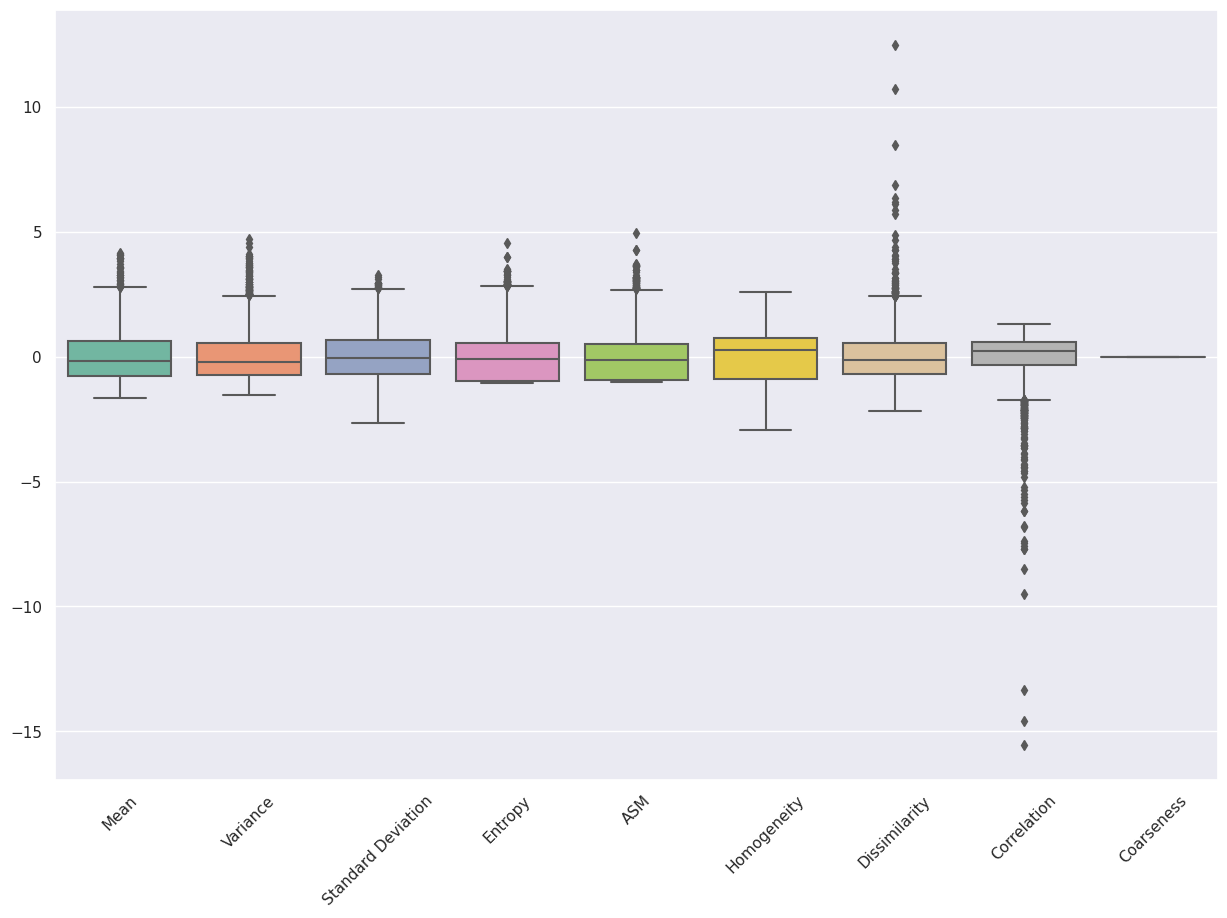

In [17]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

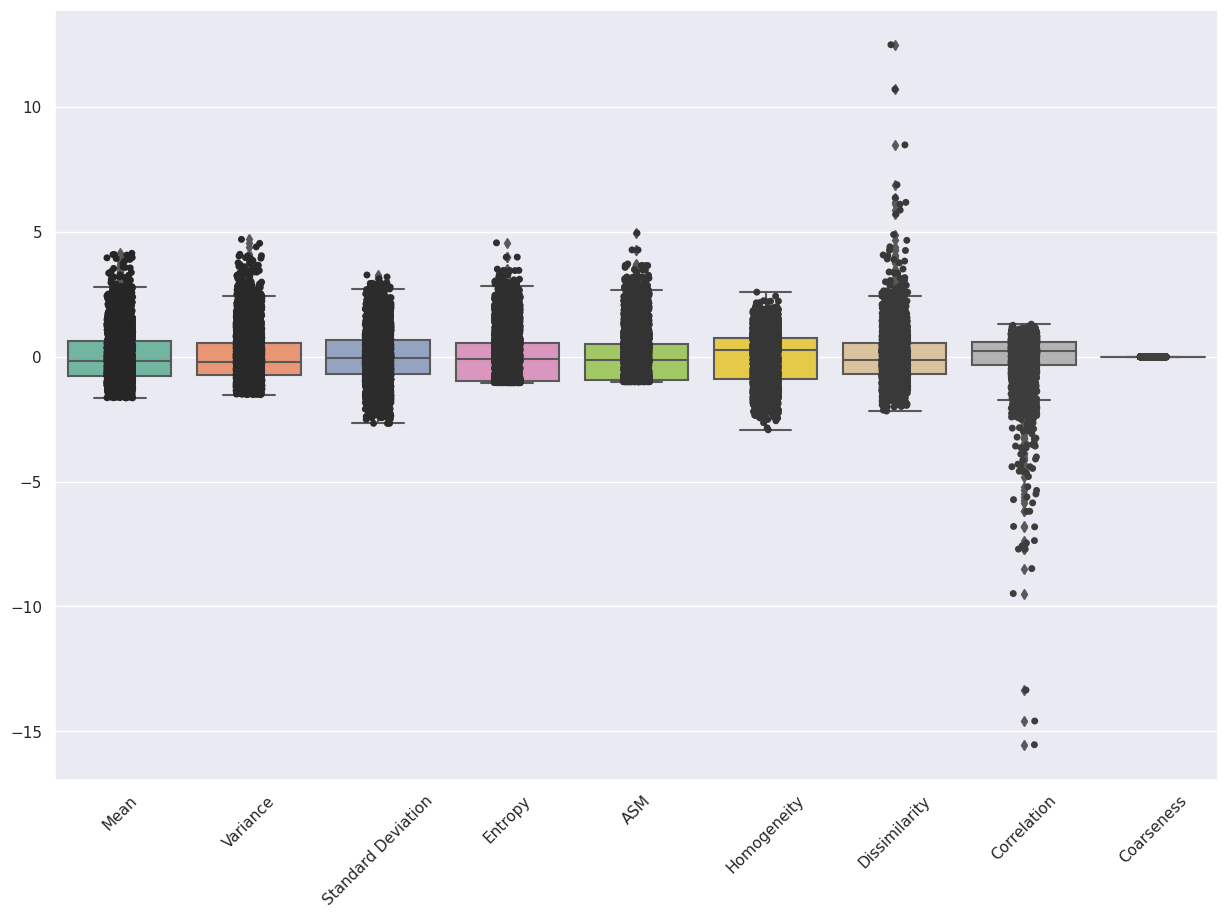

In [18]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

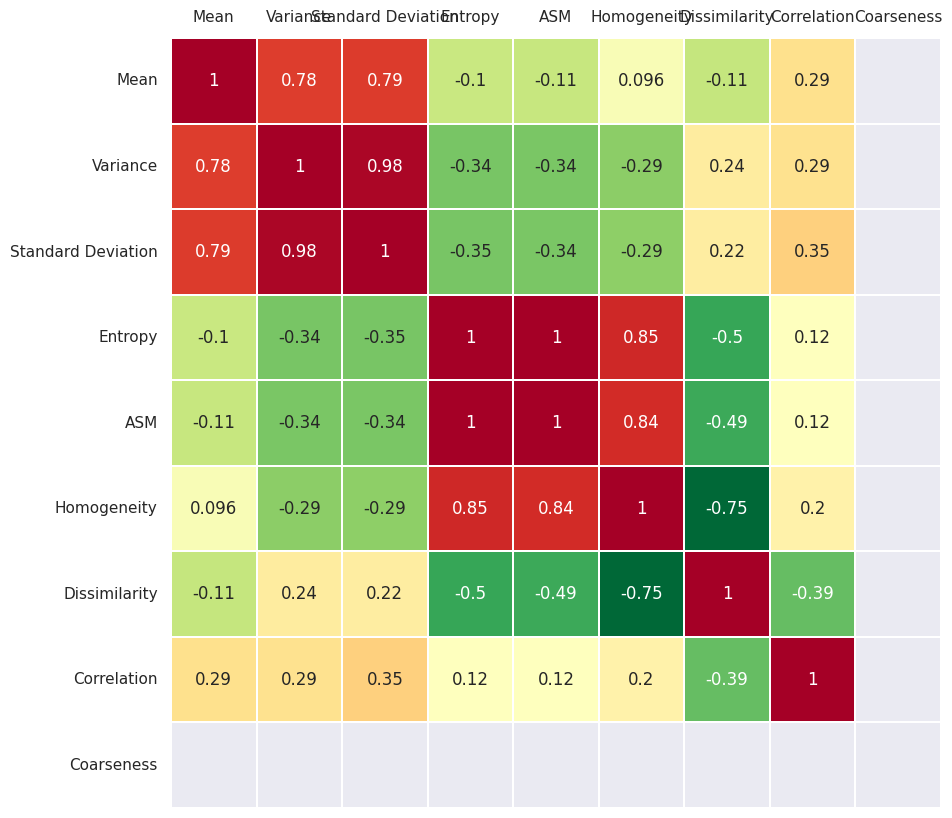

In [19]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# Principal Component Analysis (PCA)

Text(0, 0.5, 'Z2')

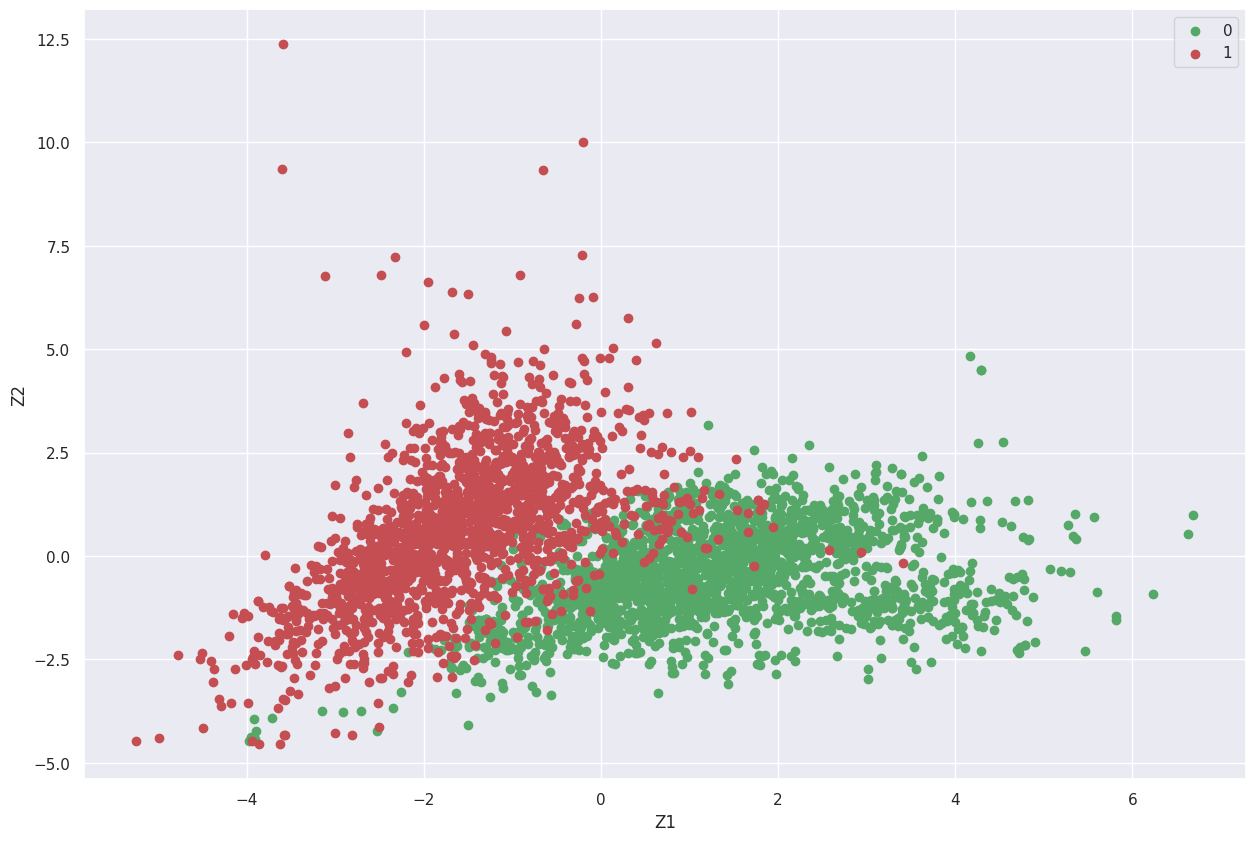

In [20]:
pca = PCA()
Z = pca.fit_transform(X)


idx_0= np.where(y == 0)
idx_1 = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

array([[-0.21220778, -0.50101134,  0.21451603,  0.38907625,  0.61823062,
        -0.34834755,  0.0539691 ,  0.00950058,  0.        ],
       [-0.36840798, -0.39870558,  0.20759373, -0.08073208, -0.44086066,
         0.15516716,  0.66111509, -0.01372805,  0.        ],
       [-0.36785106, -0.41220175,  0.14845409, -0.12791386, -0.29935623,
         0.1190696 , -0.74335837,  0.00116113,  0.        ],
       [ 0.44639473, -0.20562459,  0.31652531, -0.28904932, -0.05298823,
        -0.2192704 , -0.00884024, -0.72370372,  0.        ],
       [ 0.44377467, -0.20158413,  0.31989678, -0.31256502, -0.09530256,
        -0.28226101,  0.00409162,  0.68820523,  0.        ],
       [ 0.42614723, -0.29402916,  0.10242088,  0.22631425,  0.17953316,
         0.79734081, -0.01083591,  0.04620915,  0.        ],
       [-0.32566921,  0.29188877,  0.44465097, -0.55666054,  0.47270139,
         0.27582373,  0.03773192,  0.01435388,  0.        ],
       [ 0.00793159, -0.40686776, -0.69146392, -0.53235754,  0

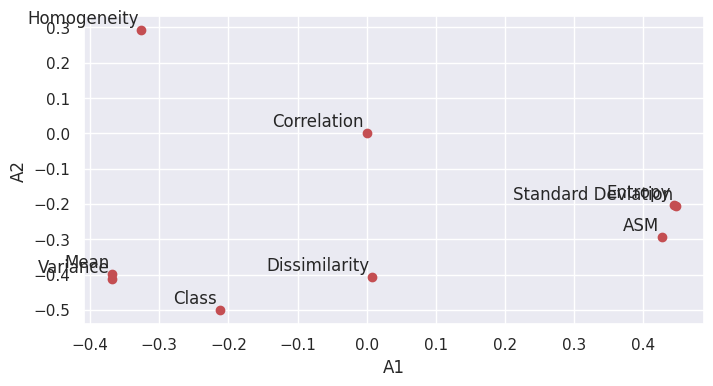

In [21]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A


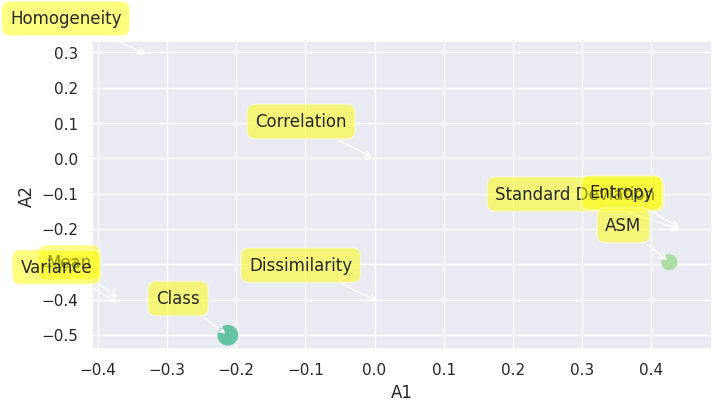

In [22]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot and Eigenvalues**

array([3.79246881e+00, 2.55056247e+00, 8.58022304e-01, 5.56238597e-01,
       1.47029120e-01, 7.67775544e-02, 2.07177823e-02, 3.10454630e-04,
       0.00000000e+00])

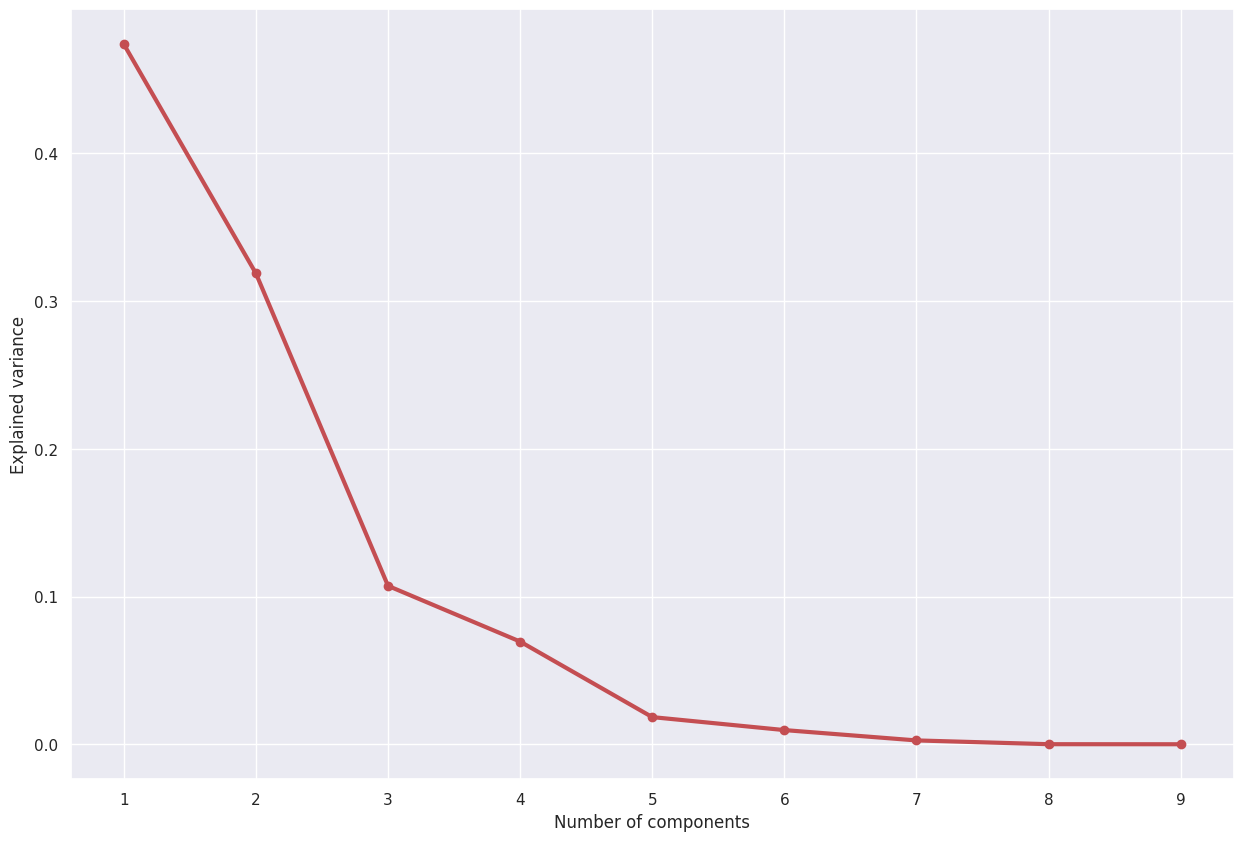

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

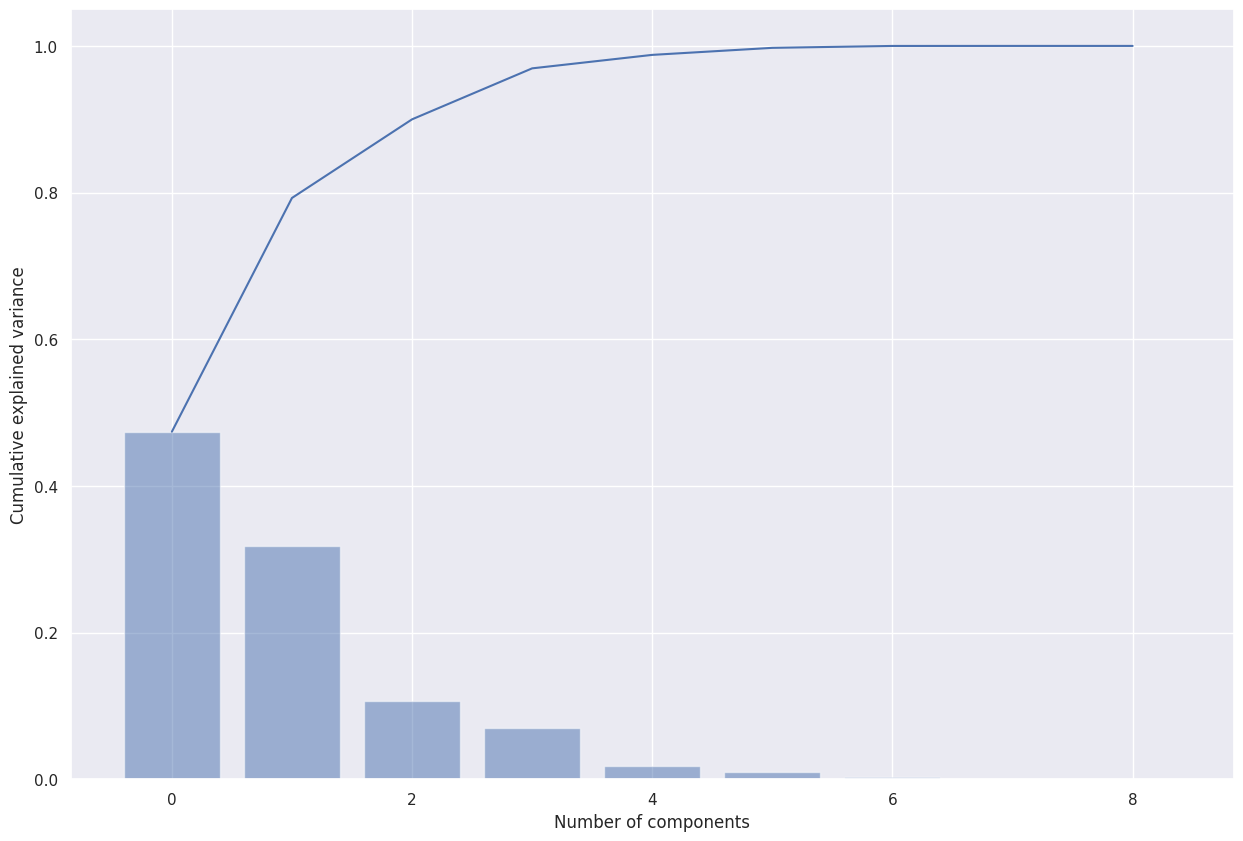

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-0.40993172, -2.45259396,  0.16459826, ..., -1.40601569,
       -0.36928406,  0.95279704])

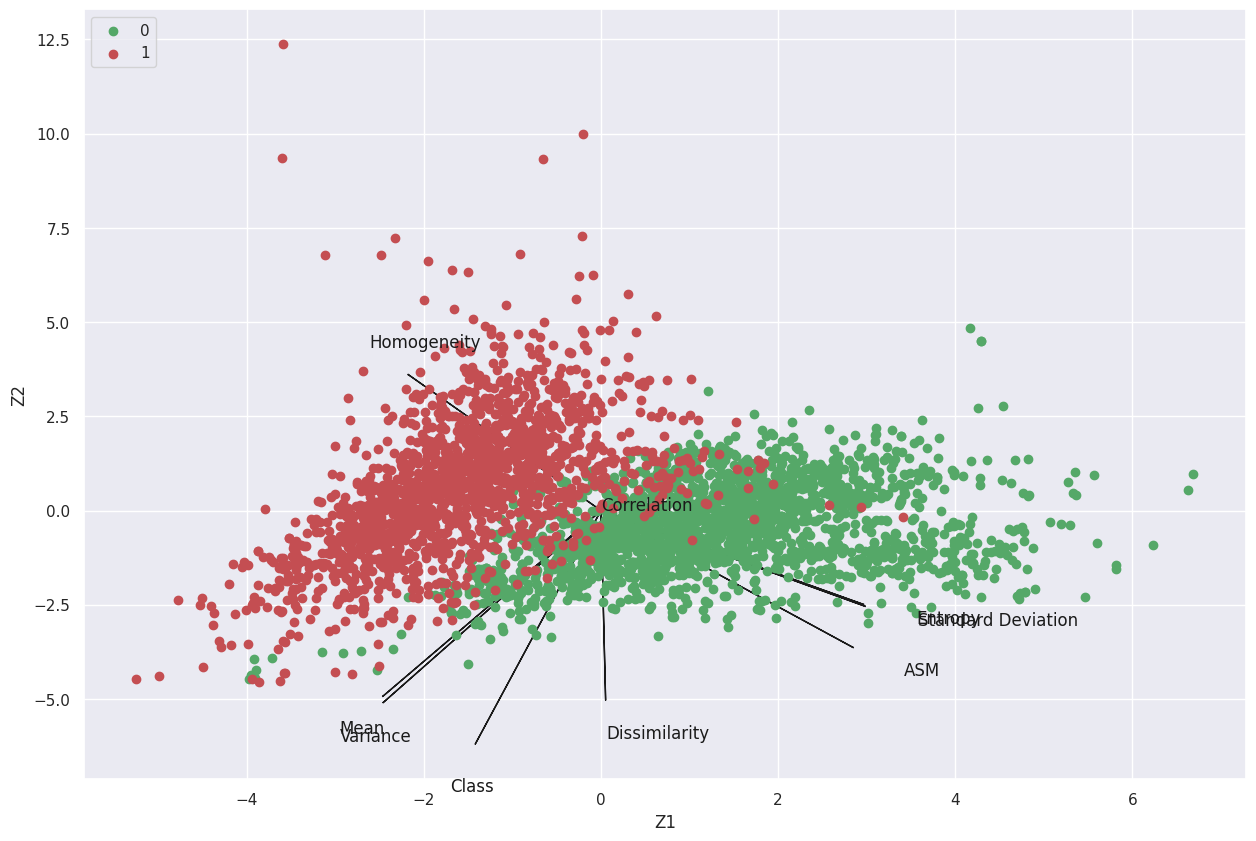

In [25]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')

plt.legend(loc='upper left')
Z1
Z2

# Using PCA Library

> Indented block



In [26]:
!pip install pca

In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [28]:
out['PC']

PC1       PC2       PC3       PC4
0     0.847418 -0.409932 -0.550768 -0.846931
1     3.159282 -2.452594  0.762787 -1.726503
2    -2.442666  0.164598 -0.831889 -0.953193
3    -2.515274  1.118516 -0.254289 -1.253109
4     0.609926 -0.309748  0.695307 -1.748617
...        ...       ...       ...       ...
3757 -1.433170 -1.701927  0.980858  0.622998
3758 -1.316995 -1.760589  0.924433  0.566908
3759 -1.139502 -1.406016  0.807985  0.404139
3760 -0.704212 -0.369284  1.272533 -0.191723
3761  0.671108  0.952797  1.074340 -0.769213

[3762 rows x 4 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [98.77%] of the variance'}, xlabel='PC1 (47.3% expl.var)', ylabel='PC2 (31.8% expl.var)'>)

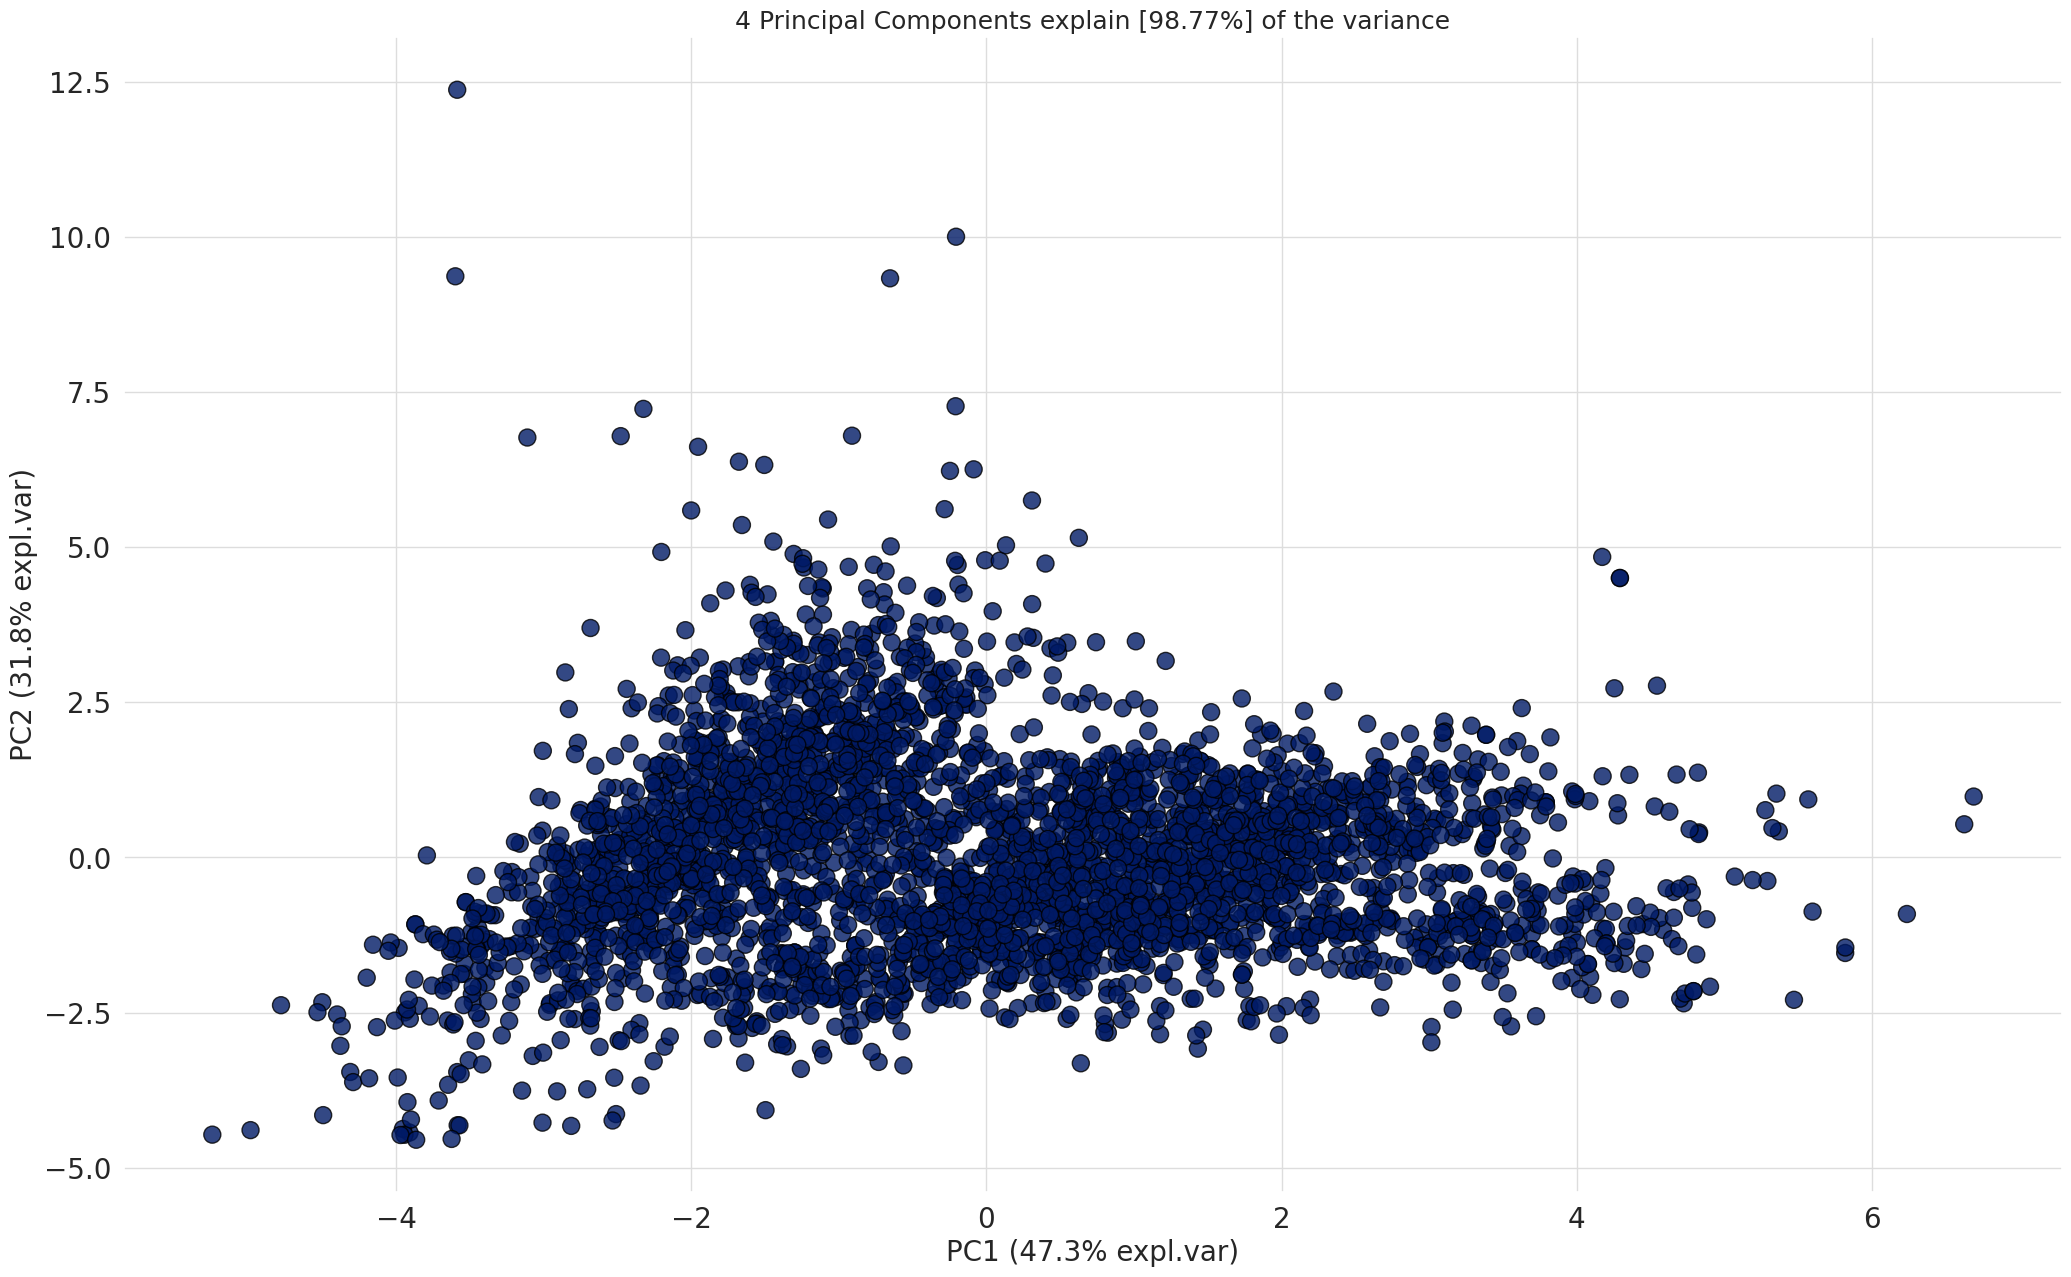

In [29]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [30]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4
Mean               -0.212208 -0.501011  0.214516  0.389076
Variance           -0.368408 -0.398706  0.207594 -0.080732
Standard Deviation -0.367851 -0.412202  0.148454 -0.127914
Entropy             0.446395 -0.205625  0.316525 -0.289049
ASM                 0.443775 -0.201584  0.319897 -0.312565
Homogeneity         0.426147 -0.294029  0.102421  0.226314
Dissimilarity      -0.325669  0.291889  0.444651 -0.556661
Correlation         0.007932 -0.406868 -0.691464 -0.532358
Coarseness          0.000000 -0.000000 -0.000000 -0.000000

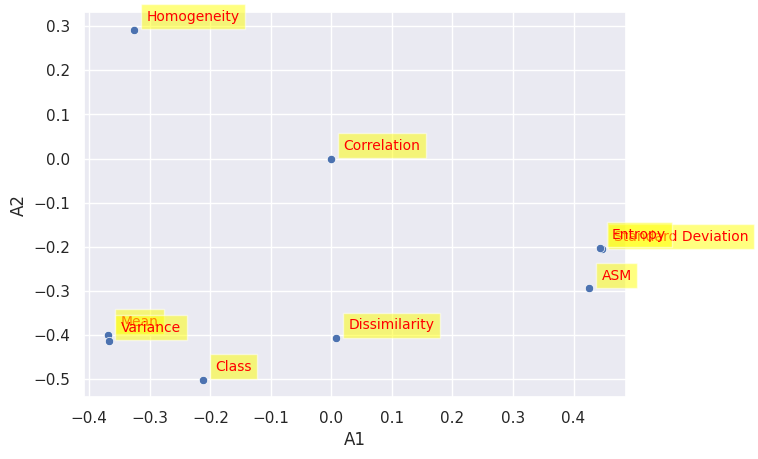

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

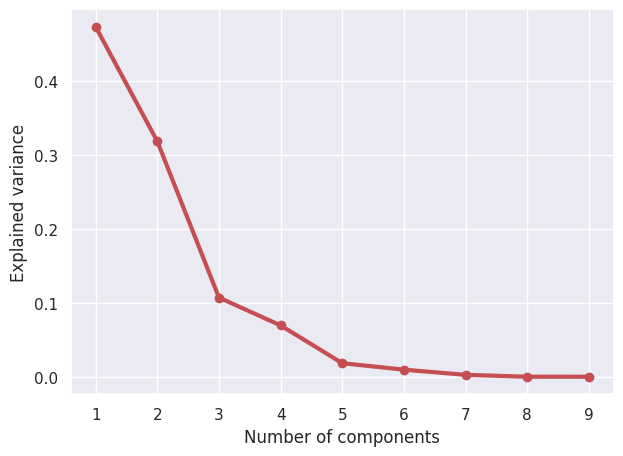

In [32]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

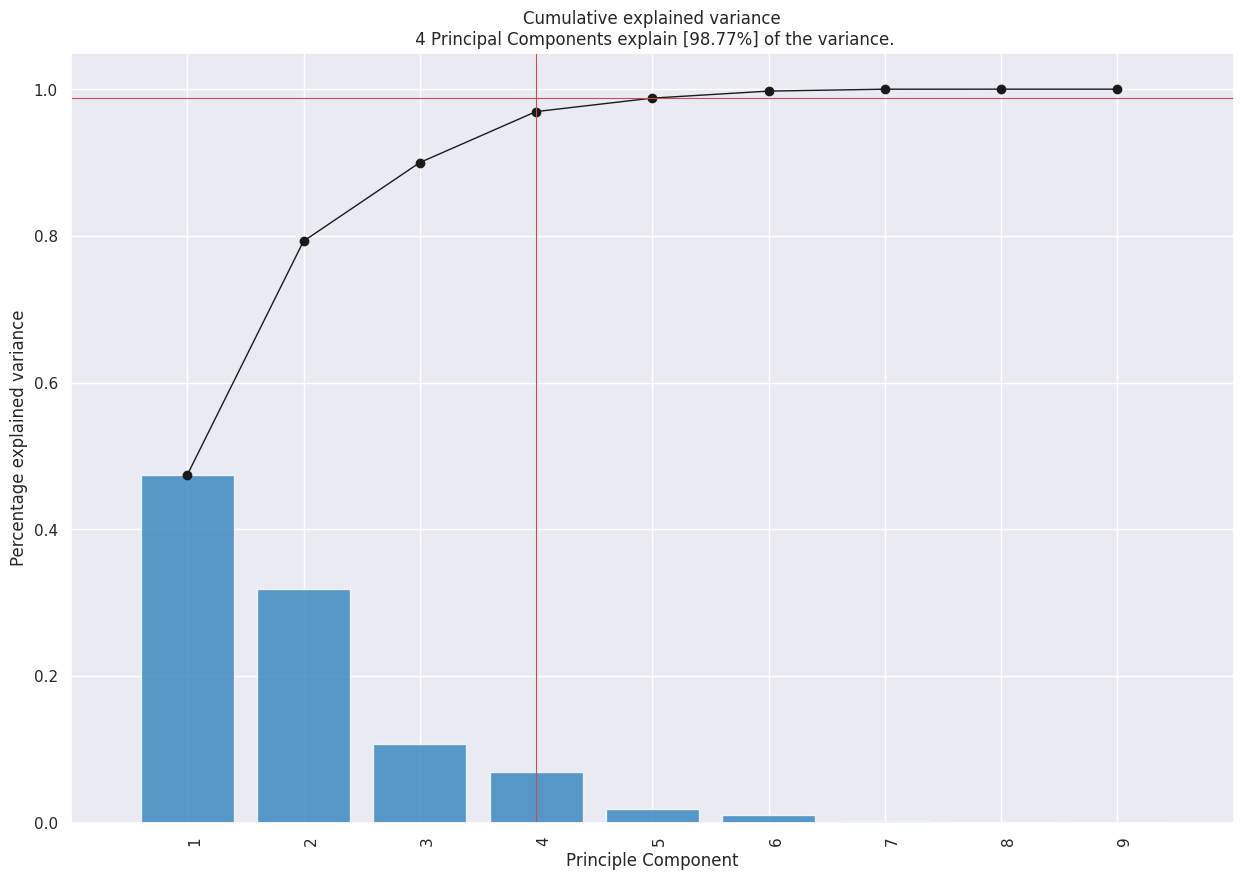

In [33]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [98.77%] of the variance'}, xlabel='PC1 (47.3% expl.var)', ylabel='PC2 (31.8% expl.var)'>)

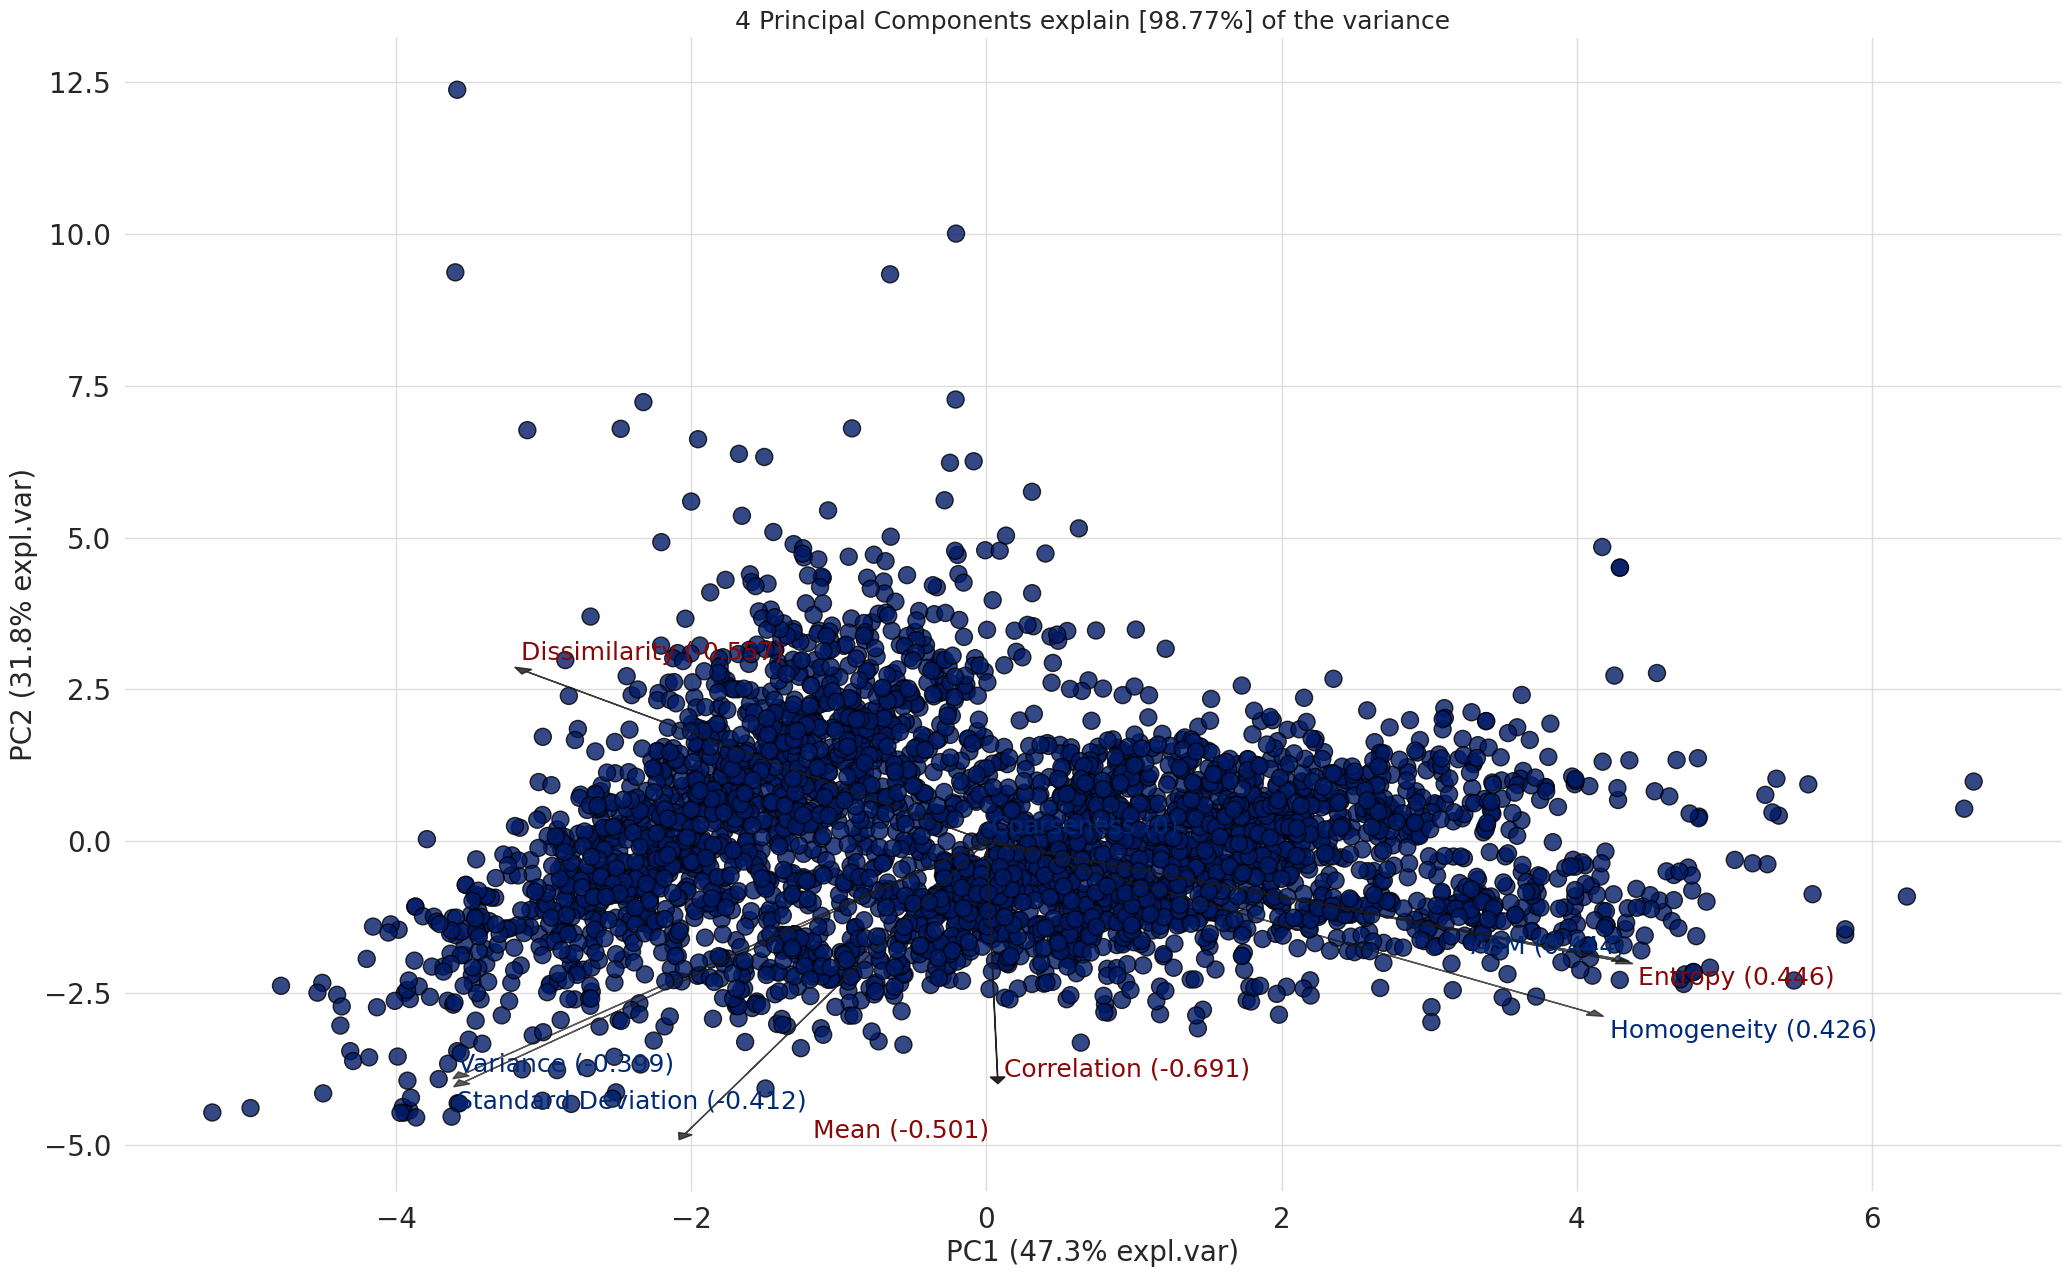

In [34]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '4 Principal Components explain [98.77%] of the variance'}, xlabel='PC1 (47.3% expl.var)', ylabel='PC2 (31.8% expl.var)', zlabel='PC3 (10.7% expl.var)'>)

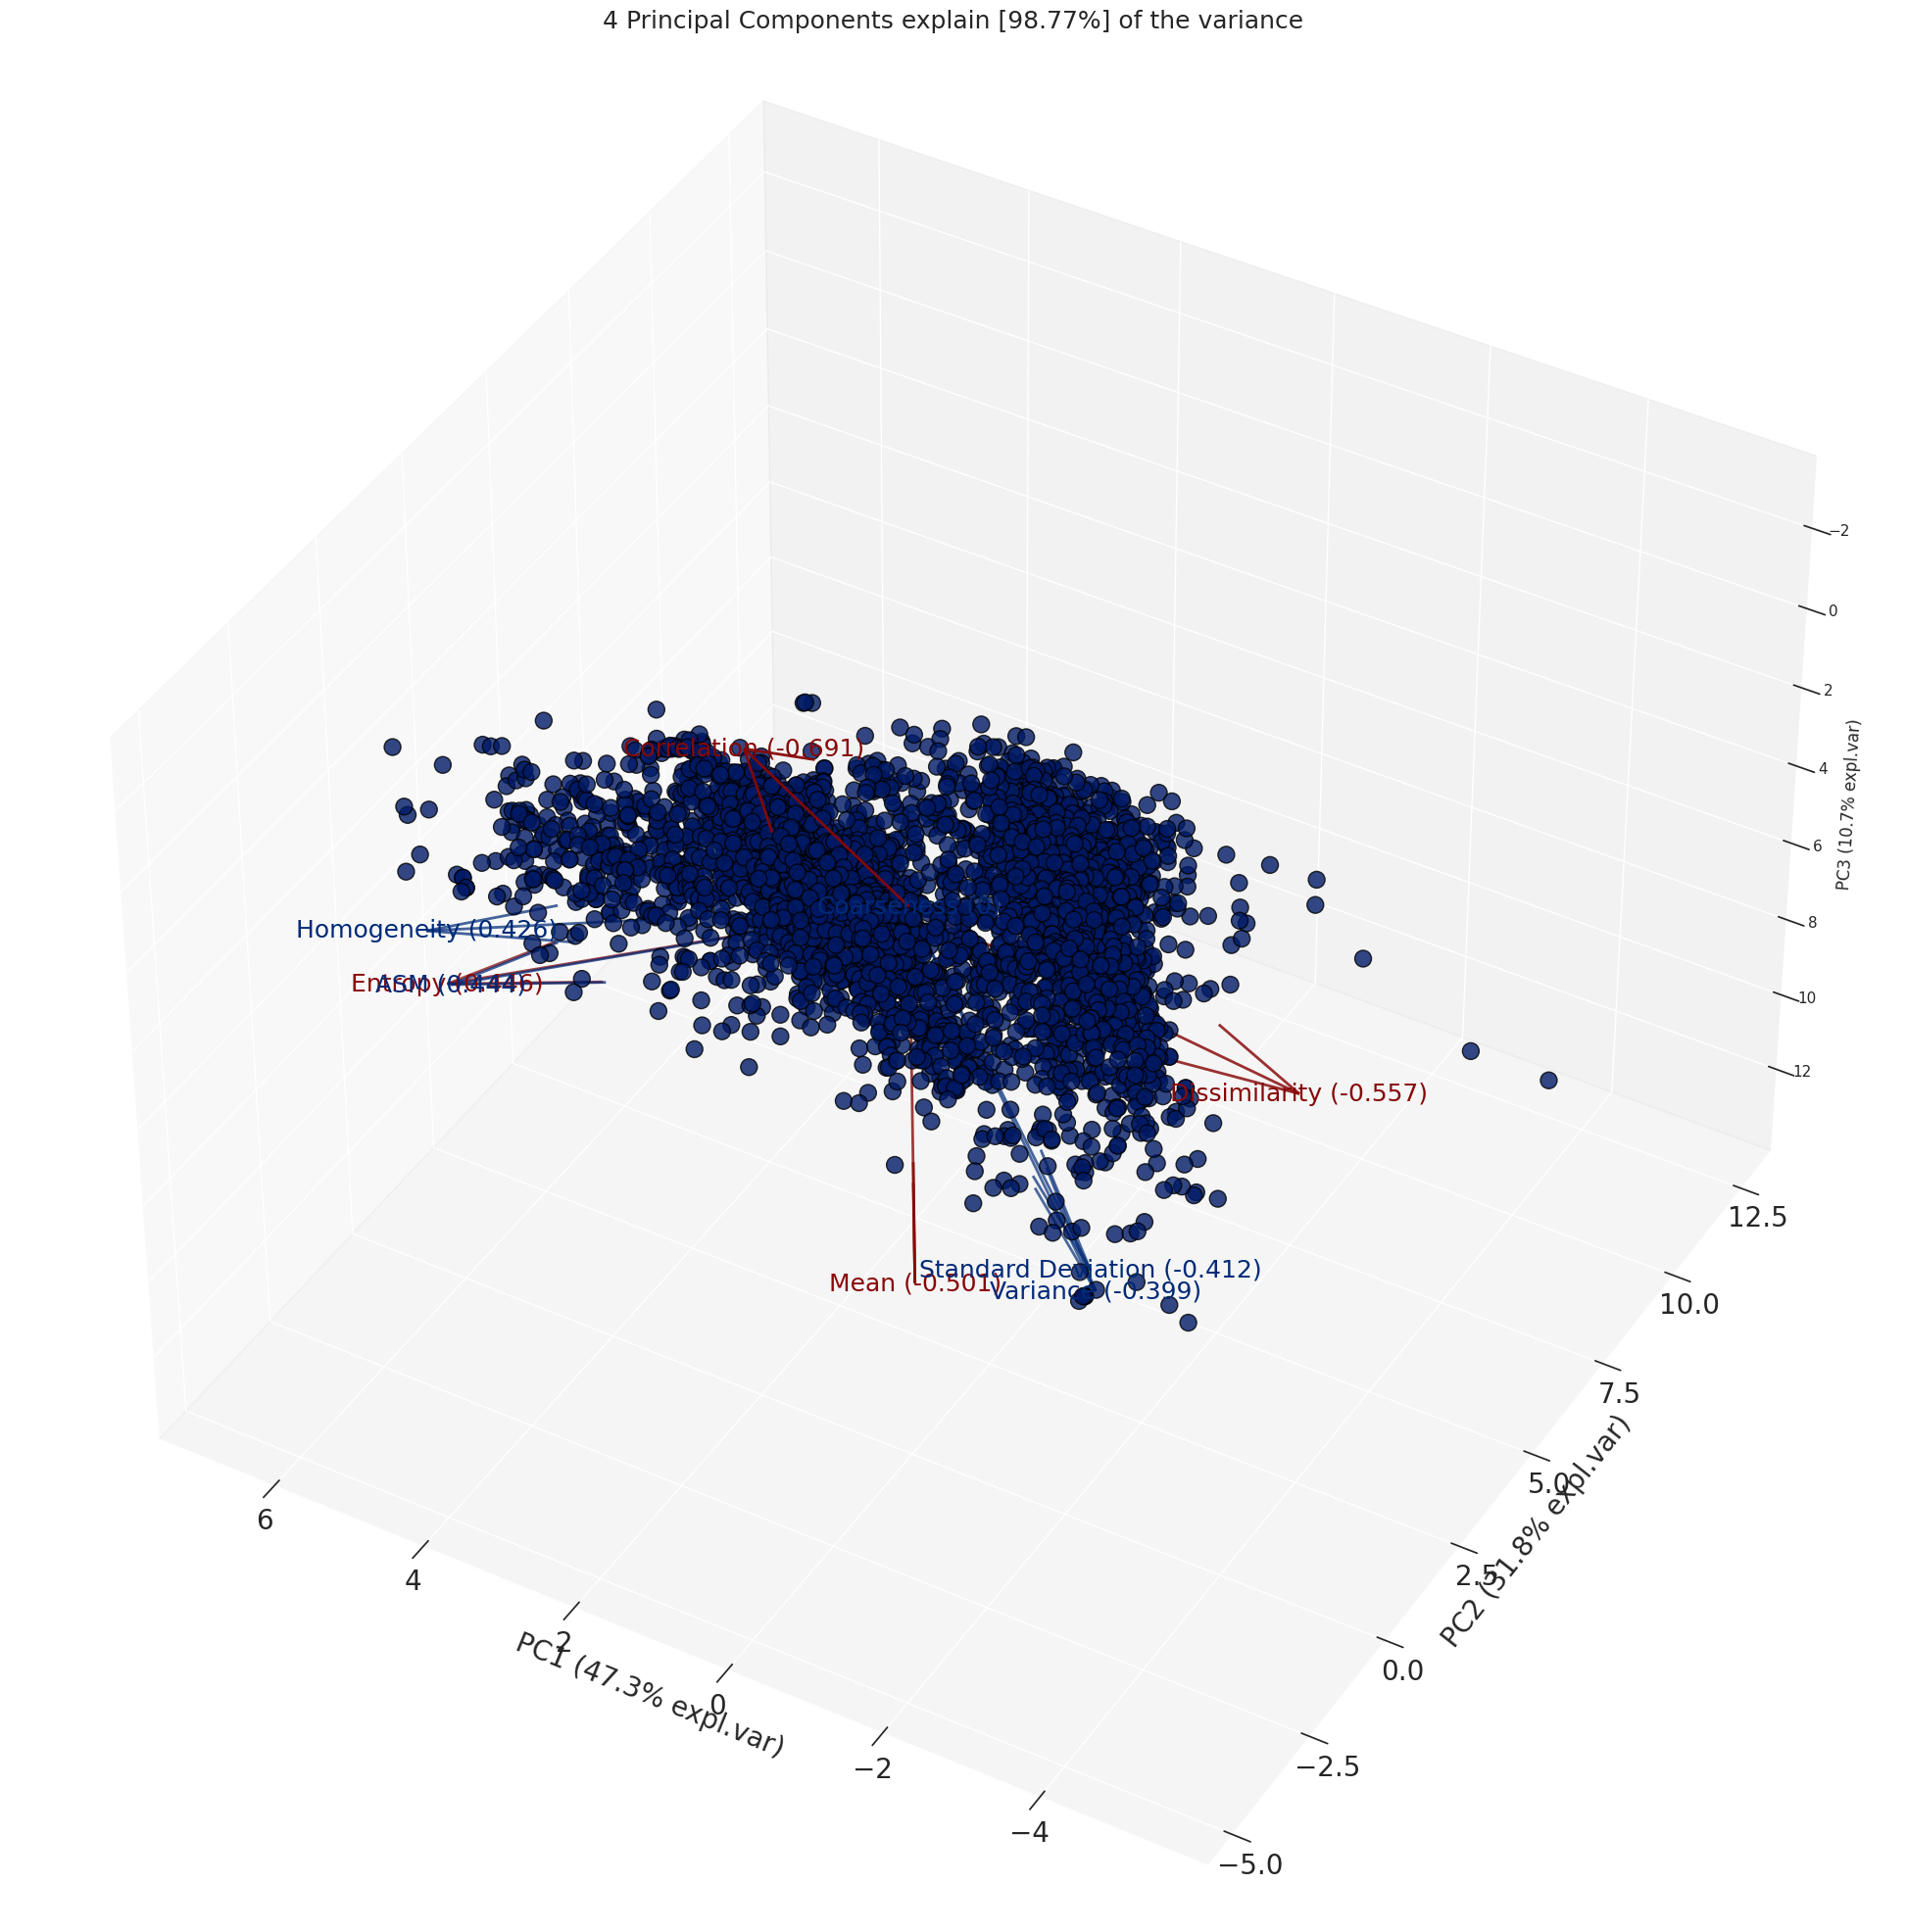

In [35]:
model.biplot3d(legend=False)

# Classification using Pycaret

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA

In [36]:
from pycaret.utils import version
version()

'3.0.0'

In [37]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3386, 10)
Unseen Data For Predictions: (376, 10)


In [38]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

**Comparing All Models**

In [39]:
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [40]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Logistic Regresssion**

In [41]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune the model

In [42]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
tuned_lr

LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
!pip install pycaret --upgrade


  Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
  Attempting uninstall: pycaret
    Found existing installation: pycaret 3.0.0
    Uninstalling pycaret-3.0.0:
      Successfully uninstalled pycaret-3.0.0


Evaluate Logistic Regression

In [45]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with K-nearest neighbour**

In [46]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune model with K-nearest neighbour

In [47]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [48]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

Evaluate model with K-nearest neighbour

In [49]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [50]:
qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune QDA Model

In [51]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [52]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

Evaluate QDA Model

In [53]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Classification + PCA

In [54]:
!pip install statsmodels --upgrade

In [57]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Comparing Models

In [58]:
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Best model with PCA

In [59]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

Tune Best Model

In [60]:
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Evaluate Best Model

In [63]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [61]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [65]:
tuned_lr_pca

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [67]:
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [68]:
tuned_knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [69]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

In [70]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [71]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [73]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [74]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [75]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [76]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [77]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [78]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [79]:
 !pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.7 MB/s eta 0:00:00


In [80]:
import shap